#**This is my first notebook.** 
##Here we will learn to write some rudimentary python code and R code, in a notebook style setup executing the same on a REMOTE Virtual Machine

In [ ]:
# Read the CSV file iris.csv
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Comp. Sci. Lab Course/PGSS2022/L1--6-28-2022/iris.csv", header=None)
df.columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Class']
df


#Reading file from Google Drive


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
! pwd


/content


In [17]:
! top

=top - 19:29:11 up 18 min,  0 users,  load average: 0.10, 0.22, 0.20
Tasks:  19 total,   1 running,  17 sleeping,   0 stopped,   1 zombie
%Cpu(s): 11.6 us,  2.1 sy,  0.0 ni, 85.5 id,  0.6 wa,  0.0 hi,  0.1 si,  0.1 st
KiB Mem : 13298580 total, 10004512 free,  1149684 used,  2144384 buff/cache
KiB Swap:        0 total,        0 free,        0 used. 11972340 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND   
      7 root      20   0  346656  57188  32904 S   6.2  0.4   0:03.71 node      
     62 root      20   0  591544 151100  47504 S   6.2  1.1   0:11.46 python3   
      1 root      20   0     992      4      0 S   0.0  0.0   0:00.60 docker-i+ 
     18 root      20   0   35892   4892   3788 S   0.0  0.0   0:00.61 tail      
     30 root      20   0       0      0      0 Z   0.0  0.0   0:06.37 python3   
     31 root      20   0  156140  41332  12692 S   0.0  0.3   0:01.18 colab-fi+ 
     44 root      20   0  200320  60972  15176 S   0.0  0.5  

In [24]:
# Read the CSV file iris.csv
import pandas as pd
df2 = pd.read_csv("https://raw.githubusercontent.com/aidang56/CMU_PGSS_2022/main/Week01/iris.csv", header=None)
df2.columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Class']
df2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
df2['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

#Exploratory Analysis of the data frame loaded from GitHub versionof iris.csv


In [28]:
df2.groupby('Class').agg({'Sepal.Length': ['min', 'max', 'mean', 'std'], 'Sepal.Width': ['min', 'max', 'mean', 'std'], 
                                  'Petal.Length': ['min', 'max', 'mean', 'std'], 'Petal.Width': ['min', 'max', 'mean', 'std']})

Sepal.Length                       Sepal.Width              \
                         min  max   mean       std         min  max   mean   
Class                                                                        
Iris-setosa              4.3  5.8  5.006  0.352490         2.3  4.4  3.418   
Iris-versicolor          4.9  7.0  5.936  0.516171         2.0  3.4  2.770   
Iris-virginica           4.9  7.9  6.588  0.635880         2.2  3.8  2.974   

                          Petal.Length                       Petal.Width       \
                      std          min  max   mean       std         min  max   
Class                                                                           
Iris-setosa      0.381024          1.0  1.9  1.464  0.173511         0.1  0.6   
Iris-versicolor  0.313798          3.0  5.1  4.260  0.469911         1.0  1.8   
Iris-virginica   0.322497          4.5  6.9  5.552  0.551895         1.4  2.5   

                                  
                  mean       std  
Class                             
Iris-setosa      0.244  0.107210  
Iris-versicolor  1.326  0.197753  
Iris-virginica   2.026  0.274650

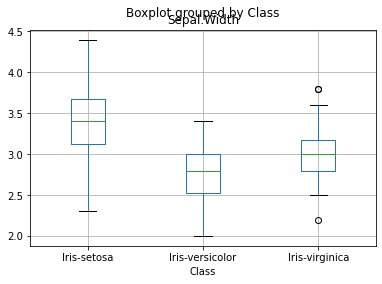

In [33]:
df2.boxplot('Sepal.Width', 'Class')

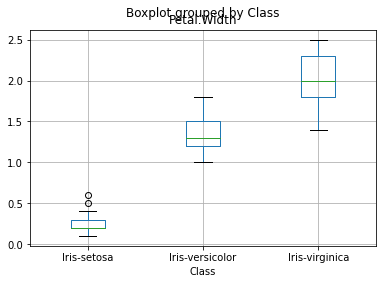

In [31]:
df2.boxplot('Petal.Width', 'Class')

#Exploratory Analysis of the data from the Google Drive


In [46]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('PGSS 2022 CS Lab Class ').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
myClassData = pd.DataFrame.from_records(rows)

myClassData = myClassData.iloc[1:,:]

myClassData.columns = ['First Name', 'Last Name', 'Andrew ID', 'Github', 'Role', 'Non-Andrew Email']
myClassData

[['First Name', 'Last Name', 'Andrew ID', 'Github', 'Role', 'Non-Andrew Email'], ['Prahlad', 'Menon', 'pgmenon', 'menonpg', 'Professor', ''], ['Aidan', 'Green', 'aidang', 'aidang56', 'Student', 'aidang626@gmail.com'], ['Nikola', 'Cao', 'nikolac', 'nikolacao', 'Student', 'cao.nikola.a@gmail.com'], ['Bea', 'Ricafort', 'bricafor', 'bricafor', 'Student', 'moiraangiebee@gmail.com'], ['Daniel', 'Zhang', 'danielz2', 'DanZfsd', 'Student', 'z331317@gmail.com'], ['Siming', 'Tang', 'simingt', 'Jelliphishi', 'Student', ''], ['Jai', 'Rastogi', 'jrastogi', 'jrastogi1349342', 'Student', ''], ['Sam', 'Wang', 'samuelw2', 'samuelwang23', 'Student', ''], ['Edison', 'DeWilde', 'edewilde', 'edewilde12', 'Student', ''], ['Hannah', 'Gong', 'hannahgo', 'hgna', 'Student', ''], ['Mason', 'Matich', 'mmatich', 'AWESDUDEtheCOOL', 'Student', ''], ['Diya', 'Hundiwala', 'dhundiwa', 'diyahundiwala', 'Student', 'diyahundiwala@gmail.com'], ['Eric', 'Cui', 'ecui', 'restlesstable29', 'Student', ''], ['Kurtis', 'Zhang', 'k

,First Name,Last Name,Andrew ID,Github,Role,Non-Andrew Email
1,Prahlad,Menon,pgmenon,menonpg,Professor,
2,Aidan,Green,aidang,aidang56,Student,aidang626@gmail.com
3,Nikola,Cao,nikolac,nikolacao,Student,cao.nikola.a@gmail.com
4,Bea,Ricafort,bricafor,bricafor,Student,moiraangiebee@gmail.com
5,Daniel,Zhang,danielz2,DanZfsd,Student,z331317@gmail.com
6,Siming,Tang,simingt,Jelliphishi,Student,
7,Jai,Rastogi,jrastogi,jrastogi1349342,Student,
8,Sam,Wang,samuelw2,samuelwang23,Student,
9,Edison,DeWilde,edewilde,edewilde12,Student,
10,Hannah,Gong,hannahgo,hgna,Student,


In [47]:
import numpy as np
myClassData['Non-Andrew Email'][myClassData['Non-Andrew Email']==""] = np.nan
myClassData['Non-Andrew Email'].isna().value_counts()

True     15
False     7
Name: Non-Andrew Email, dtype: int64

In [48]:
myClassData['Role'].value_counts()

Student      18
TA            3
Professor     1
Name: Role, dtype: int64

In [50]:
myClassData

,First Name,Last Name,Andrew ID,Github,Role,Non-Andrew Email
1,Prahlad,Menon,pgmenon,menonpg,Professor,NaN
2,Aidan,Green,aidang,aidang56,Student,aidang626@gmail.com
3,Nikola,Cao,nikolac,nikolacao,Student,cao.nikola.a@gmail.com
4,Bea,Ricafort,bricafor,bricafor,Student,moiraangiebee@gmail.com
5,Daniel,Zhang,danielz2,DanZfsd,Student,z331317@gmail.com
6,Siming,Tang,simingt,Jelliphishi,Student,NaN
7,Jai,Rastogi,jrastogi,jrastogi1349342,Student,NaN
8,Sam,Wang,samuelw2,samuelwang23,Student,NaN
9,Edison,DeWilde,edewilde,edewilde12,Student,NaN
10,Hannah,Gong,hannahgo,hgna,Student,NaN
